In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
# zdefiniowanie wymiarów obrazu wejsciowego
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba dabych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba dabych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

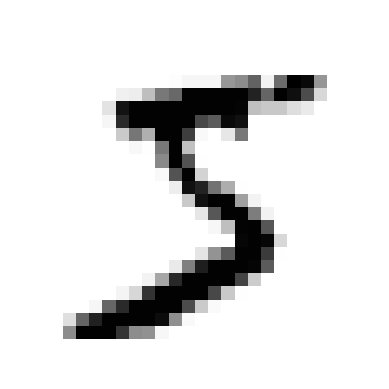

In [22]:
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

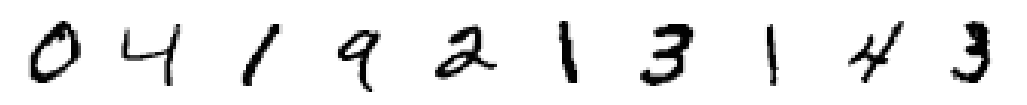

In [23]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

In [24]:
# Obsługa problemu zapisu obrazów wejściowych - channel first vs. channel last
print(K.image_data_format())

if K.image_data_format() == 'channel_first':
  # liczba probek,1 - liczba kanalow(kolorow), rozmiar obrazka
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
  # liczba probek, rozmiar obrazka(kolorow), 1 - liczba kanalow
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(input_shape)

channels_last
(28, 28, 1)


In [25]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [27]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape =(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [28]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, batch_size=28, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
2143/2143 [==============================] - 11s 5ms/step - loss: 0.6354 - accuracy: 0.8062 - val_loss: 0.4210 - val_accuracy: 0.8876
Epoch 2/30
2143/2143 [==============================] - 12s 5ms/step - loss: 0.6086 - accuracy: 0.8143 - val_loss: 0.3994 - val_accuracy: 0.8904
Epoch 3/30
2143/2143 [==============================] - 10s 5ms/step - loss: 0.5840 - accuracy: 0.8188 - val_loss: 0.3826 - val_accuracy: 0.8948
Epoch 4/30
2143/2143 [==============================] - 10s 5ms/step - loss: 0.5630 - accuracy: 0.8292 - val_loss: 0.3677 - val_accuracy: 0.8986
Epoch 5/30
2143/2143 [==============================] - 10s 5ms/step - loss: 0.5457 - accuracy: 0.8350 - val_loss: 0.3551 - val_accuracy: 0.9021
Epoch 6/30
2143/2143 [==============================] - 10s 5ms/step - loss: 0.5275 - accuracy: 0.8393 - val_loss: 0.3442 - val_accuracy: 0.9043
Epoch 7/30
2143/2143 [==============================] - 12s 6ms/step - loss: 0.5124 - accuracy: 0.8436 - val_loss: 0.3341 - val_ac

In [39]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2288 - accuracy: 0.9324
Test loss: 0.22875866293907166
Test accuracy: 0.9323999881744385


In [40]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.635390,0.806183,0.420974,0.8876
1,0.608587,0.814317,0.399374,0.8904
2,0.584032,0.818750,0.382559,0.8948
3,0.562954,0.829250,0.367703,0.8986
4,0.545679,0.834967,0.355134,0.9021
5,0.527453,0.839250,0.344236,0.9043
6,0.512427,0.843650,0.334106,0.9064
7,0.504900,0.847767,0.325825,0.9089
8,0.491433,0.850467,0.318218,0.9110
9,0.479687,0.855783,0.310767,0.9131


In [41]:

def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()


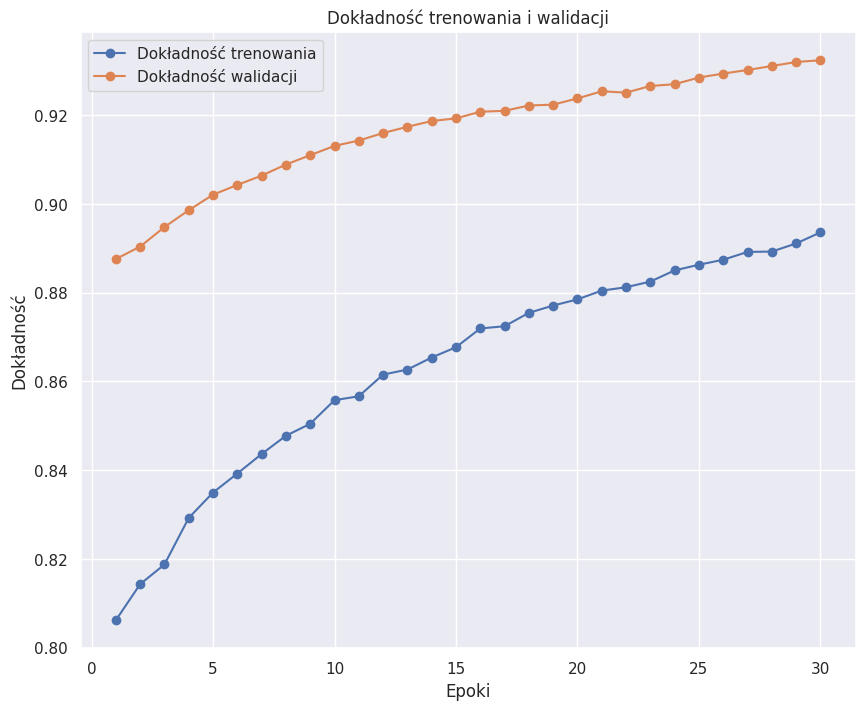

In [42]:
make_accuracy_plot(history)

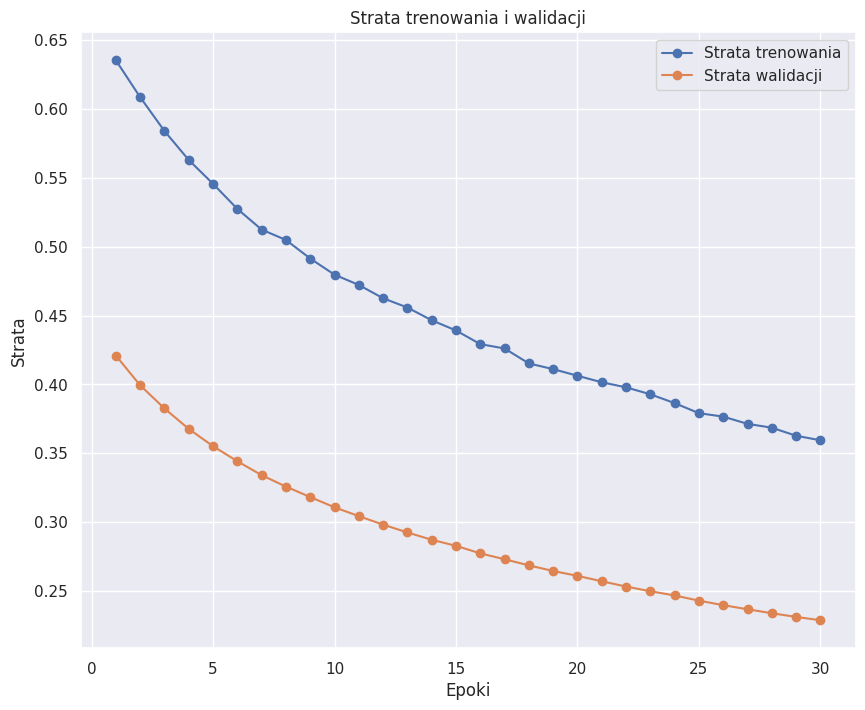

In [43]:
make_loss_plot(history)